In [57]:
%matplotlib notebook

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [103]:
# import csv
rough = "Resources/suicide_rates.csv"
rough_data_df = pd.read_csv(rough)

In [108]:
# drop unnecessary columns
rough_df = rough_data_df.drop(columns=['HDI for year', 'country-year'])

# clean up age range fill
rough_df['age'] = rough_df['age'].replace({'35-54 years': '35-54', '25-34 years': '25-34', '55-74 years': '55-74', '75+ years': '75+', '15-24 years': '15-24', '5-14 years': '05-14'})

# rename columns
renamed_df = rough_df.rename(columns={"country":"Country", "year":"Year", "sex":"Sex", "age":"Age Range", "suicides_no":"Suicide Count", "population":"Population", "suicides/100k pop":"Suicides/100k pop", " gdp_for_year ($) ":"GDP(Year)", "gdp_per_capita ($)":"GDP per Capita", "generation":"Generation"})

# filter for years 2000-2016
after_start_date = renamed_df["Year"] >= 2000
before_end_date = renamed_df["Year"] <= 2016
between_two_dates = after_start_date & before_end_date
filtered_date = renamed_df.loc[between_two_dates]

filtered_date_df = pd.DataFrame(filtered_date)

# display sample

filtered_date_df.head()


,Country,Year,Sex,Age Range,Suicide Count,Population,Suicides/100k pop,GDP(Year),GDP per Capita,Generation
132,Albania,2000,male,25-34,17,232000,7.33,"3,632,043,908",1299,Generation X
133,Albania,2000,male,55-74,10,177400,5.64,"3,632,043,908",1299,Silent
134,Albania,2000,female,75+,2,37800,5.29,"3,632,043,908",1299,G.I. Generation
135,Albania,2000,male,75+,1,24900,4.02,"3,632,043,908",1299,G.I. Generation
136,Albania,2000,female,15-24,6,263900,2.27,"3,632,043,908",1299,Generation X


In [149]:
country = filtered_date_df["Country"]

gdp_year = filtered_date_df["GDP(Year)"]

suicides = filtered_date_df["Suicides/100k pop"]

country_df = pd.DataFrame({"Country": country, "GDP(Year)": gdp_year, "Suicides/100k pop": suicides})

#country_df = country_df.set_index('Country')

country_df


,Country,GDP(Year),Suicides/100k pop
132,Albania,"3,632,043,908",7.33
133,Albania,"3,632,043,908",5.64
134,Albania,"3,632,043,908",5.29
135,Albania,"3,632,043,908",4.02
136,Albania,"3,632,043,908",2.27
...,...,...,...
27815,Uzbekistan,"63,067,077,179",2.96
27816,Uzbekistan,"63,067,077,179",2.58
27817,Uzbekistan,"63,067,077,179",2.17
27818,Uzbekistan,"63,067,077,179",1.67


<IPython.core.display.Javascript object>


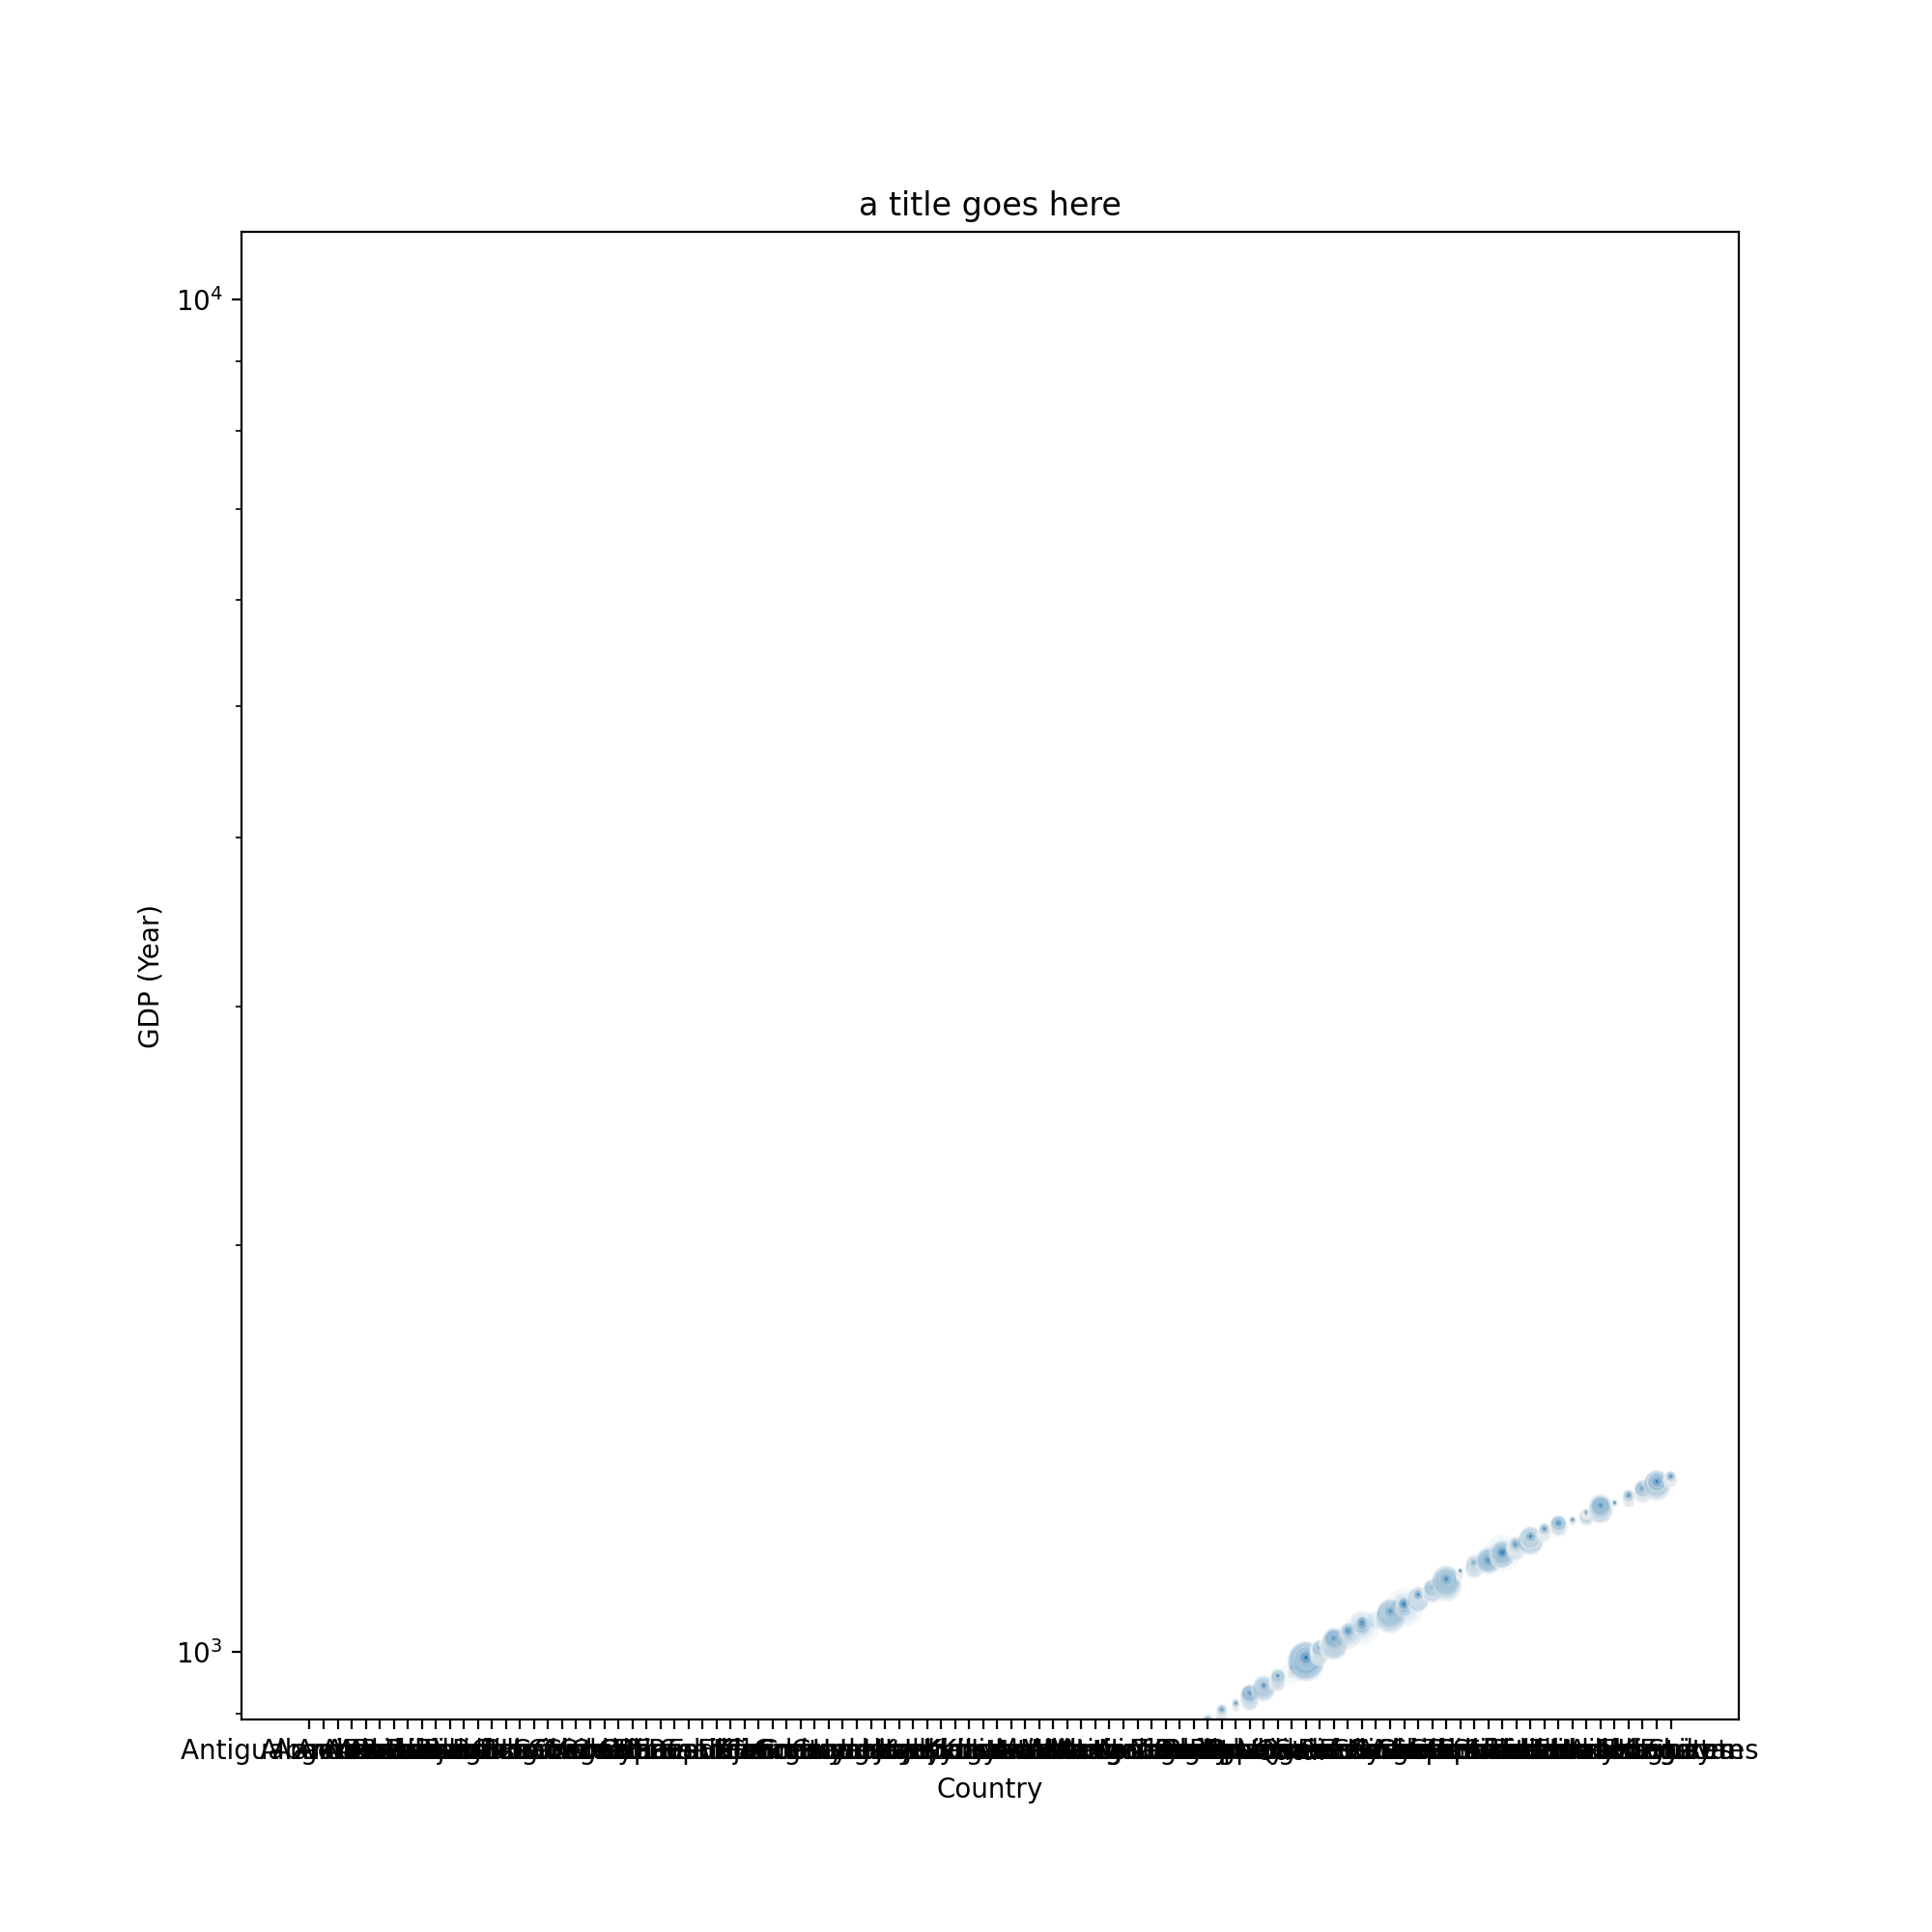

In [148]:
# Set the figure size
plt.figure(figsize=(10, 10))

# Scatterplot
plt.scatter(
    x = age_df["Country"], 
    y = age_df["GDP(Year)"], 
    s= age_df["Suicides/100k pop"], 
    cmap="tab20", 
    alpha=0.05, 
    edgecolors="white", 
    linewidth=2);
 
# Add titles (main and on axis)
plt.yscale('log')
plt.xlabel("Country")
plt.ylabel("GDP (Year)")
plt.title("a title goes here")
#plt.ylim(?,?)
#plt.xlim(?, ?);

# Display plot
plt.show()

In [111]:
age = filtered_date_df['Age Range']

country = filtered_date_df["Country"]

gdp_year = filtered_date_df["GDP(Year)"]

suicides = filtered_date_df["Suicides/100k pop"]

age_df = pd.DataFrame({"Age Range": age, "Country": country, "GDP(Year)": gdp_year, "Suicides/100k pop": suicides})

age_df

,Age Range,Country,GDP(Year),Suicides/100k pop
132,25-34,Albania,"3,632,043,908",7.33
133,55-74,Albania,"3,632,043,908",5.64
134,75+,Albania,"3,632,043,908",5.29
135,75+,Albania,"3,632,043,908",4.02
136,15-24,Albania,"3,632,043,908",2.27
...,...,...,...,...
27815,35-54,Uzbekistan,"63,067,077,179",2.96
27816,75+,Uzbekistan,"63,067,077,179",2.58
27817,05-14,Uzbekistan,"63,067,077,179",2.17
27818,05-14,Uzbekistan,"63,067,077,179",1.67


<IPython.core.display.Javascript object>


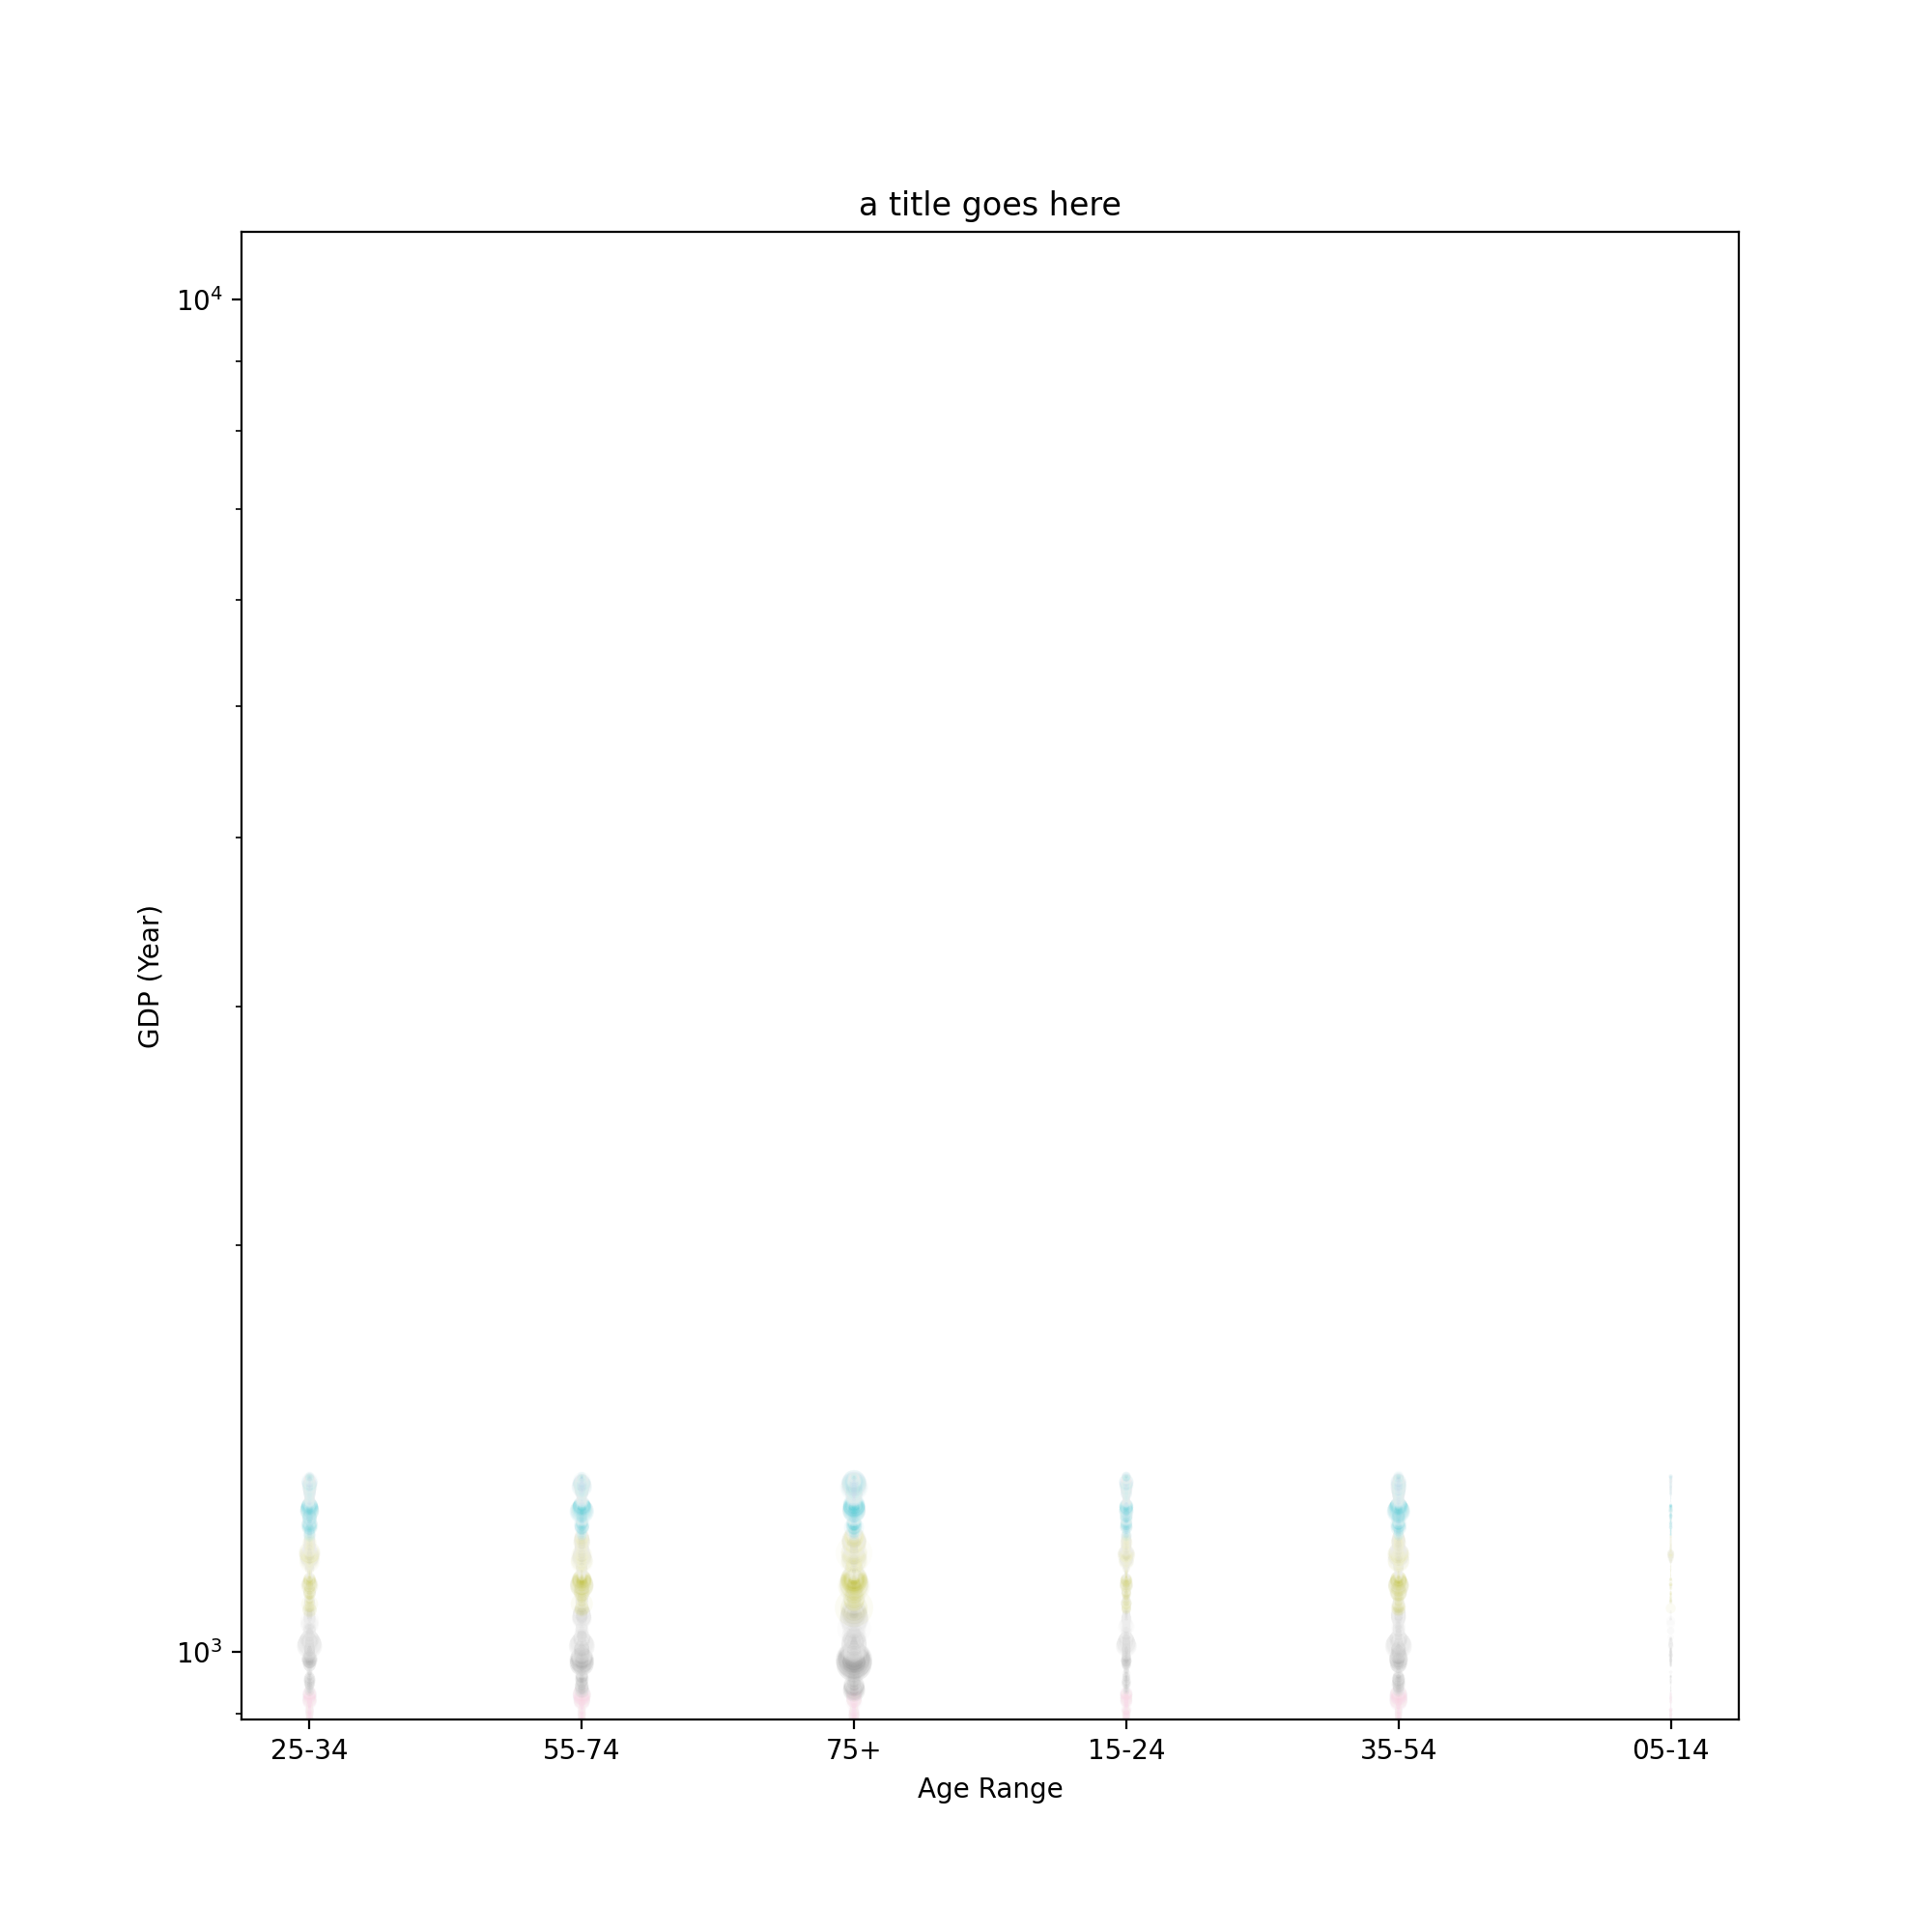

In [150]:
age_df["Country"] = pd.Categorical(age_df["Country"])

# Set the figure size
plt.figure(figsize=(10, 10))

# Scatterplot
plt.scatter(
    x = age_df["Age Range"], 
    y = age_df["GDP(Year)"], 
    s= age_df["Suicides/100k pop"], 
    c= age_df["Country"].cat.codes, 
    cmap="tab20", 
    alpha=0.05, 
    edgecolors="white", 
    linewidth=2);
 
# Add titles (main and on axis)
plt.yscale('log')
plt.xlabel("Age Range")
plt.ylabel("GDP (Year)")
plt.title("a title goes here")
#plt.ylim(?,?)
#plt.xlim(?, ?);

# Display plot
plt.show()

In [95]:
gender = filtered_date_df['Sex']

country = filtered_date_df["Country"]

gdp_year = filtered_date_df["GDP(Year)"]

Suicides = filtered_date_df["Suicides/100k pop"]

gender_df = pd.DataFrame({"Sex": gender, "Country": country, "GDP(Year)": gdp_year, "Suicides/100k pop": suicides})

gender_df

,Sex,Country,GDP(Year),Suicides/100k pop
132,male,Albania,"3,632,043,908",7.33
133,male,Albania,"3,632,043,908",5.64
134,female,Albania,"3,632,043,908",5.29
135,male,Albania,"3,632,043,908",4.02
136,female,Albania,"3,632,043,908",2.27
...,...,...,...,...
27815,female,Uzbekistan,"63,067,077,179",2.96
27816,female,Uzbekistan,"63,067,077,179",2.58
27817,male,Uzbekistan,"63,067,077,179",2.17
27818,female,Uzbekistan,"63,067,077,179",1.67


<IPython.core.display.Javascript object>


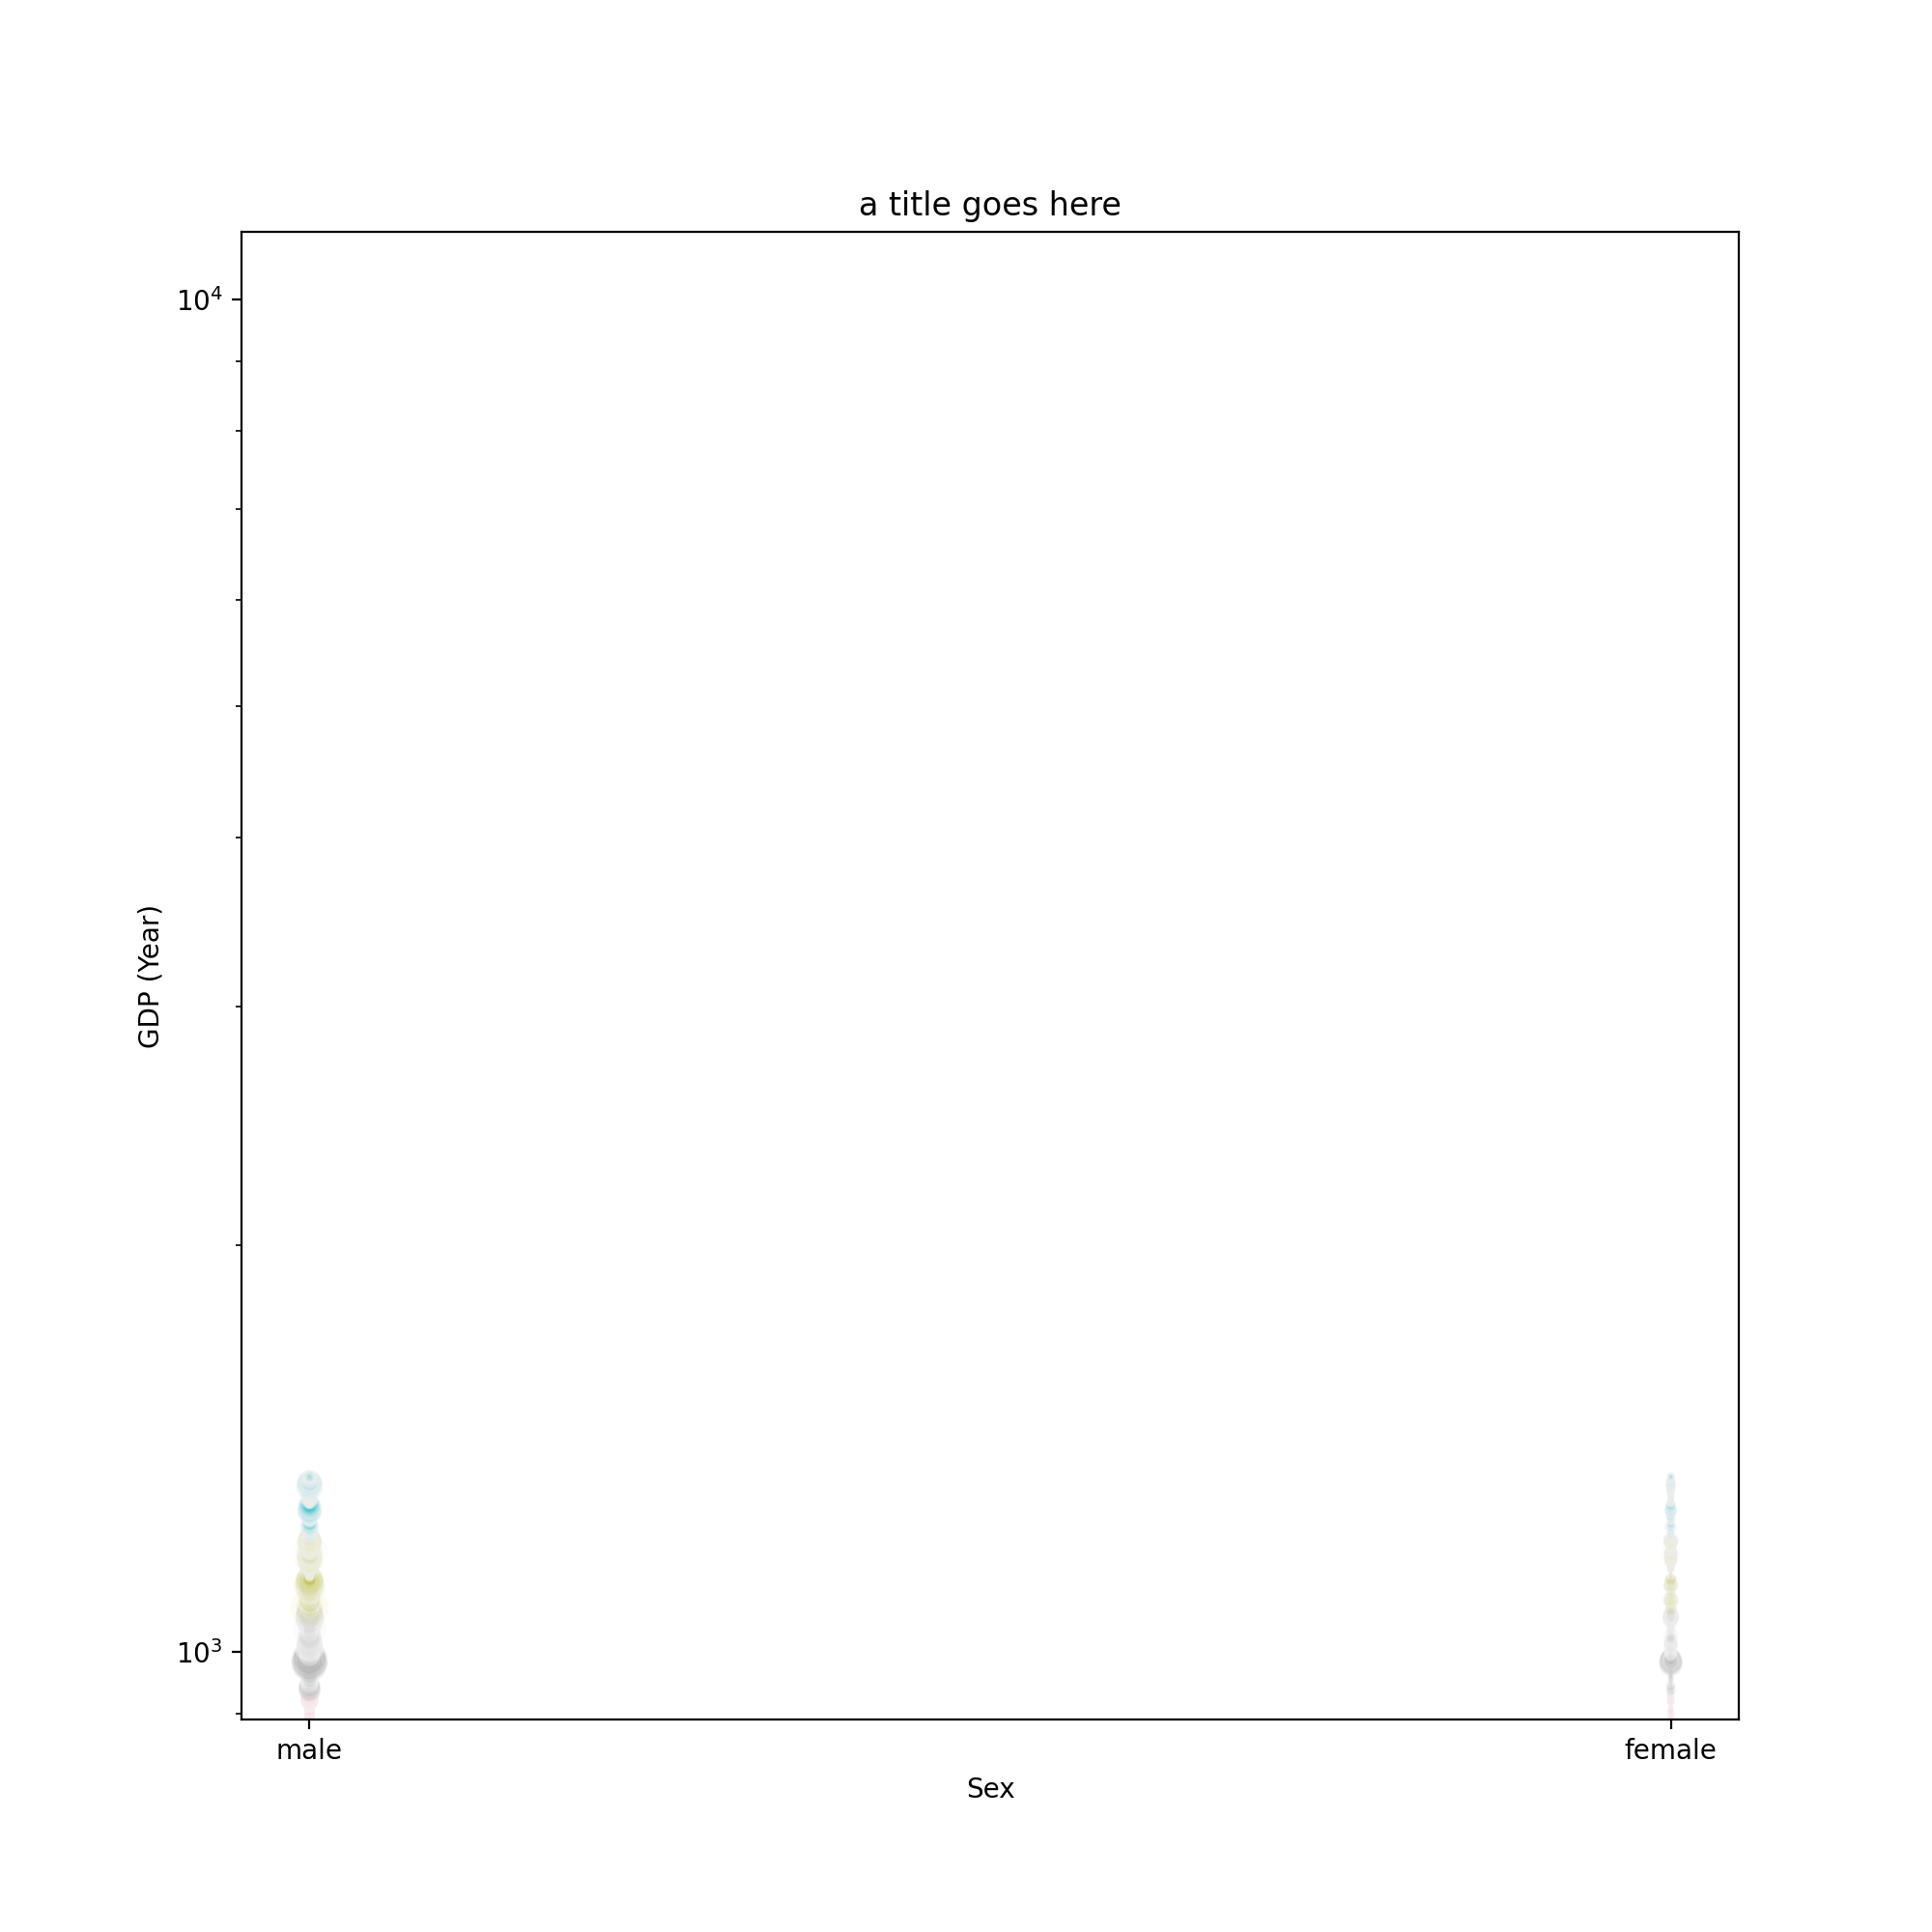

In [152]:
gender_df["Country"] = pd.Categorical(gender_df["Country"])

# Set the figure size
plt.figure(figsize=(10, 10))

# Scatterplot
plt.scatter(
    x = gender_df["Sex"], 
    y = gender_df["GDP(Year)"], 
    s= gender_df["Suicides/100k pop"], 
    c= gender_df["Country"].cat.codes, 
    cmap="tab20", 
    alpha=0.05, 
    edgecolors="white", 
    linewidth=2);
 
# Add titles (main and on axis)
plt.yscale('log')
plt.xlabel("Sex")
plt.ylabel("GDP (Year)")
plt.title("a title goes here")
#plt.ylim(?,?)
#plt.xlim(?, ?);

# Display plot
plt.show()

In [38]:
#Are suicide rates higher in developing countries or developed countries?

#heatmap of suicide rates globally 


In [98]:
#Country v.  Overall suicide rate
#mean_sui = filtered_date_df['Suicides/100k pop'].mean()
#filtered_date_df['Above Average?'] = (filtered_date_df['Suicides/100k pop'] >= mean_sui)

df_Country_Overall_suicide_rate = filtered_date_df.groupby('Country')['Suicides/100k pop'].mean()
#filtered_date_df.head()

#define 'Overall suicide rate'
#mean_sui1 = filtered_date_df['Suicides/100k pop'].mean()
mean_sui2 = df_Country_Overall_suicide_rate.mean()
#print(mean_sui1)raw average
#print(mean_sui2)average of averages
#df_Country_Overall_suicide_rate['Suicides/100k pop'] 
#df_df_Country_Overall_suicide_rate() 
Deviation = df_Country_Overall_suicide_rate - mean_sui2
country_mean_df = pd.DataFrame({"Country Mean":df_Country_Overall_suicide_rate, "Global Mean":mean_sui2, "Deviation":Deviation})
country_mean_df

,Country Mean,Global Mean,Deviation
Country,,,
Albania,3.381667,11.481212,-8.099545
Antigua and Barbuda,0.874405,11.481212,-10.606807
Argentina,10.186094,11.481212,-1.295118
Armenia,3.131517,11.481212,-8.349695
Aruba,8.142639,11.481212,-3.338573
...,...,...,...
United Arab Emirates,1.317917,11.481212,-10.163295
United Kingdom,6.769635,11.481212,-4.711577
United States,12.945417,11.481212,1.464205


In [100]:
#Gender v. Country & Suicide rate
Gender_tmp_df = filtered_date_df.groupby(['Country','Sex'])['Suicides/100k pop'].mean()


Gender_tmp_df.head()

Country              Sex   
Albania              female    2.475909
                     male      4.287424
Antigua and Barbuda  female    0.185952
                     male      1.562857
Argentina            female    3.373229
Name: Suicides/100k pop, dtype: float64

In [101]:
#Age Range v. Country & Suicide rate
Age_tmp_df = filtered_date_df.groupby(['Country','Age Range'])['Suicides/100k pop'].mean()

Age_tmp_df




Country     Age Range
Albania     15-24        3.287273
            25-34        4.156364
            35-54        3.963182
            5-14         0.524091
            55-74        3.438182
                           ...   
Uzbekistan  25-34        9.044583
            35-54        9.106667
            5-14         1.203333
            55-74        7.130000
            75+          5.862500
Name: Suicides/100k pop, Length: 587, dtype: float64

In [42]:
#suicide rates in the United States for 2017-2019?

In [43]:
#Aggrate data by gender/gdp & suicide rate for 2017-2019

In [44]:
#Aggrate Data by gender/gdp & suicide rate for 2017-2019